In [1]:
import sys
import os
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from pathlib import Path
import matplotlib.pyplot as plt
from src.conversation import Conversation

In [2]:
# if __name__ == '__main__':
read_dir = Path('../result/raw/')
# save_dir = Path('./result/print/')
# save_dir.mkdir(parents=True, exist_ok=True)

filepaths = sorted(Path(read_dir).glob('*.json'))
conv = Conversation()

score_lists = []
for path in filepaths:
    print(path)
    conv.load(path)
    # savepath = save_dir / (path.stem + '.txt')
    # with open(savepath, 'w') as f:
    #     sys.stdout = f
    #     conv.print_history()
    #     sys.stdout = sys.__stdout__

    scores = []
    for cv in conv.conversation:
        if 'score' in cv.keys():
            scores.append(cv['score'])
    score_lists.append(scores)
    # break

../result/raw/000.json
../result/raw/001.json
../result/raw/002.json
../result/raw/003.json
../result/raw/004.json
../result/raw/005.json
../result/raw/006.json
../result/raw/007.json
../result/raw/008.json
../result/raw/009.json


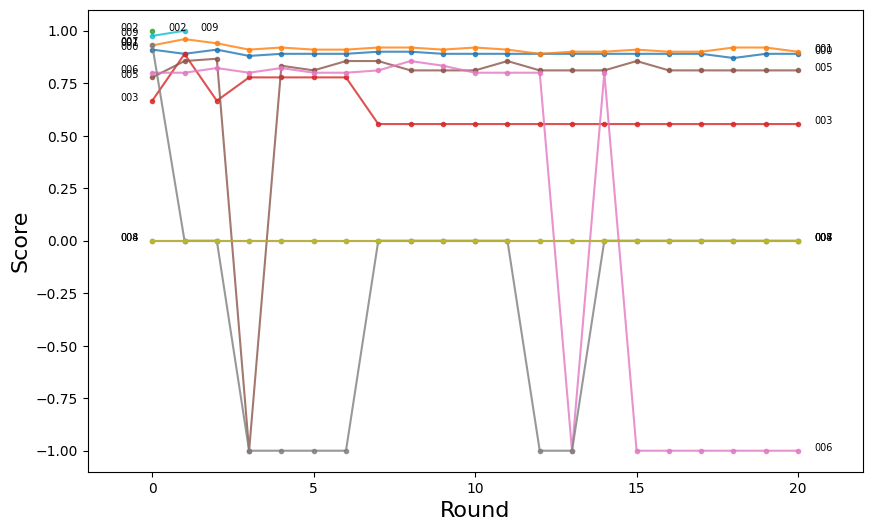

In [4]:
plt.figure(figsize=(10, 6))
for cnt, s in enumerate(score_lists):
    plt.plot(s[:-1], marker='o', markersize=3, alpha=.8)
    plt.text(-1, s[0], f'{str(cnt).zfill(3)}', fontsize=7)
    plt.text(len(s) - 1.5, s[-2], f'{str(cnt).zfill(3)}', fontsize=7)
plt.xlim(-2, 22)
# plt.ylim(-0.1, 1.05)
plt.xlabel('Round', size=16)
plt.ylabel('Score', size=16)
plt.show()
plt.close()